In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
match_stat = pd.read_csv('C:/Users/123/Desktop/project3/match_info.csv', sep = ',')

In [3]:
match_stat.head(5)

,id,country_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,league_name,country_name,home_team_ln,home_team_sn,away_team_ln,away_team_sn,match_winner_id,match_winner
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium Jupiler League,Belgium,KRC Genk,GEN,Beerschot AC,BAC,0,draw
1,2,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium Jupiler League,Belgium,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK,0,draw
2,3,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium Jupiler League,Belgium,KSV Cercle Brugge,CEB,RSC Anderlecht,AND,8635,AND
3,4,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium Jupiler League,Belgium,KAA Gent,GEN,RAEC Mons,MON,9991,GEN
4,5,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium Jupiler League,Belgium,FCV Dender EH,DEN,Standard de Liège,STL,9985,STL


### Учитываем в названии команды сезон

In [4]:
match_stat['home_team'] = match_stat['home_team_ln']+match_stat['season']
match_stat['away_team'] = match_stat['away_team_ln']+match_stat['season']
match_stat = match_stat.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,18,13,14,19,15,16,17]]
match_stat
match_stat.head(5)

,id,country_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,league_name,country_name,home_team_ln,home_team,home_team_sn,away_team_ln,away_team,away_team_sn,match_winner_id,match_winner
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium Jupiler League,Belgium,KRC Genk,KRC Genk2008/2009,GEN,Beerschot AC,Beerschot AC2008/2009,BAC,0,draw
1,2,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium Jupiler League,Belgium,SV Zulte-Waregem,SV Zulte-Waregem2008/2009,ZUL,Sporting Lokeren,Sporting Lokeren2008/2009,LOK,0,draw
2,3,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium Jupiler League,Belgium,KSV Cercle Brugge,KSV Cercle Brugge2008/2009,CEB,RSC Anderlecht,RSC Anderlecht2008/2009,AND,8635,AND
3,4,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium Jupiler League,Belgium,KAA Gent,KAA Gent2008/2009,GEN,RAEC Mons,RAEC Mons2008/2009,MON,9991,GEN
4,5,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium Jupiler League,Belgium,FCV Dender EH,FCV Dender EH2008/2009,DEN,Standard de Liège,Standard de Liège2008/2009,STL,9985,STL


### Определяем количество побед каждой из команд

In [5]:
# функция, определяющая победителя в матче
def win(match_stat):
    
    if match_stat.home_team_goal > match_stat.away_team_goal:
        return match_stat.home_team
    elif match_stat.away_team_goal > match_stat.home_team_goal:
        return match_stat.away_team
    else:
        return 'draw'

In [6]:
match_stat['match_winner'] = match_stat[['home_team_goal','away_team_goal','home_team','away_team']].apply(win, axis=1)

In [7]:
# считаем число побед для каждой команды
win_count = match_stat.groupby(['match_winner', 'match_winner_id']).count().iloc[:,1:2] \
    .sort_values(by = 'country_id', ascending = False) \
    .rename(columns = {'country_id' : 'win_count'}).reset_index()

In [8]:
win_count = win_count.drop(0)

### Определяем количество поражений каждой команды

In [9]:
# функция, определяющая проиграшего в матче
def lose(match_stat):
    
    if match_stat.home_team_goal < match_stat.away_team_goal:
        return match_stat.home_team
    elif match_stat.home_team_goal > match_stat.away_team_goal:
        return match_stat.away_team
    else:
        return 'draw'

In [10]:
# функция, определяющая id проигравшего в матче
def lose_id(match_stat):
    
    if match_stat.home_team_goal < match_stat.away_team_goal:
        return match_stat.home_team_api_id
    elif match_stat.home_team_goal > match_stat.away_team_goal:
        return match_stat.away_team_api_id
    else:
        return 0

In [11]:
match_stat['match_loser'] = match_stat[['home_team_goal', 'away_team_goal', 'home_team', 'away_team']] \
    .apply(lose, axis = 1)

In [12]:
match_stat['match_loser_id'] = match_stat[['home_team_goal', 'away_team_goal', 'home_team_api_id', 'away_team_api_id']] \
    .apply(lose_id, axis = 1)

In [13]:
# считаем число поражений для каждой команды
lose_count = match_stat.groupby(['match_loser', 'match_loser_id']).count().iloc[:,1:2] \
    .sort_values(by = 'country_id', ascending = False) \
    .rename(columns = {'country_id' : 'lose_count'}).reset_index()

In [14]:
lose_count = lose_count.drop(0)

### Определяем количество ничьих для каждой команды

In [15]:
df_away_draw = match_stat.loc[match_stat['match_winner'] == 'draw'] \
    .groupby(by = ['away_team', 'away_team_api_id']).count().iloc[:,1:2].reset_index()

In [16]:
df_home_draw = match_stat.loc[match_stat['match_winner'] == 'draw'] \
    .groupby(['home_team', 'home_team_api_id']).count().iloc[:,1:2].reset_index()

In [17]:
# считаем число ничьих для каждой команды: дома и на выезде
df_draw = df_away_draw.merge(df_home_draw, how = 'outer', left_on = ['away_team','away_team_api_id'], 
                             right_on = ['home_team', 'home_team_api_id']). \
    rename(columns = {'country_id_x': 'count_away_draw', 'country_id_y': 'count_home_draw'}).fillna(0)
df_draw['sum_draw'] = df_draw['count_away_draw'] + df_draw['count_home_draw']

In [18]:
# некоторые команды не имели ничьих, играя на своем поле, поэтому после соединения двух датафреймов с помощью outer некоторые
# значения для домашних команд обнулились. функция позволяет заполнить строки, где возникли значения 0, чтобы выстроить все
# команды в 1 столбец
for idx, row in df_draw.iterrows():
    if  df_draw.loc[idx,'home_team'] == 0 and df_draw.loc[idx,'home_team_api_id'] == 0:
        df_draw.loc[idx,'home_team'] = df_draw.away_team[idx]
        df_draw.loc[idx,'home_team_api_id'] = df_draw.away_team_api_id[idx]

In [19]:
df_draw = df_draw[['home_team', 'home_team_api_id', 'sum_draw']].rename(columns = {'home_team': 'team_name',
                                                                                   'home_team_api_id': 'team_api_id'})

In [20]:
df_draw.head()

,team_name,team_api_id,sum_draw
0,1. FC Kaiserslautern2010/2011,8350.0,7.0
1,1. FC Kaiserslautern2011/2012,8350.0,11.0
2,1. FC Köln2008/2009,8722.0,6.0
3,1. FC Köln2009/2010,8722.0,11.0
4,1. FC Köln2010/2011,8722.0,5.0


### Создаем таблицу с данными по числу выигранных, проигранных матчей и коэффициенту выигрыша

In [21]:
team_results = win_count.merge(lose_count, how = 'left', left_on = ['match_winner', 'match_winner_id'],
                right_on = ['match_loser', 'match_loser_id'])

In [22]:
team_results = team_results.drop(['match_loser', 'match_loser_id'], axis = 1)

In [23]:
team_results = team_results.fillna(0)

In [24]:
team_results = team_results.merge(df_draw, how = 'left', left_on = ['match_winner', 'match_winner_id'], 
                   right_on = ['team_name', 'team_api_id'])

In [25]:
team_results = team_results.drop(['team_name', 'team_api_id'], axis = 1).rename({'match_winner': 'team_name',
                                                                                 'match_winner_id': 'team_api_id'})

In [26]:
team_results = team_results.fillna(0)

In [27]:
team_results['matches_count'] = team_results.win_count + team_results.lose_count + team_results.sum_draw

In [28]:
team_results['win_coef'] = team_results['win_count'] / (team_results['win_count'] + team_results['lose_count'] 
                                                        + team_results['sum_draw'])

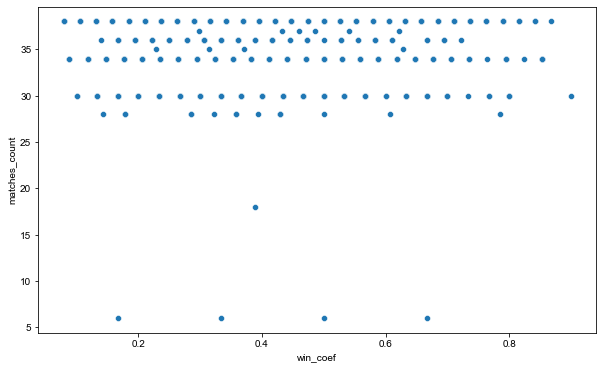

In [29]:
# scatter plot для зависимости между matches_count и win_coef. заметны лики, связанные с тем, что некоторые команды имеют мало
# игр в сезонах (в частности в Белгийской лиге), поскольку исходные данные не отображают действительность. P.S. : мы проверили
# исходные данные.
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'win_coef', y = 'matches_count', data = team_results)
sns.set_style("whitegrid")

In [30]:
# скорректируем значения команд, коэффициент которых сильно завышен в связи с недостатком данных о матчей
for idx, row in team_results.iterrows():
    if  team_results.loc[idx,'win_coef'] > 0.4 and team_results.loc[idx,'matches_count'] < 20:
        team_results.loc[idx,'sum_draw'] = team_results.sum_draw[idx] + 30
        team_results.loc[idx,'matches_count'] = team_results.matches_count[idx] + 30

In [31]:
team_results['win_coef'] = team_results['win_count'] / (team_results['win_count'] + team_results['lose_count'] 
                                                        + team_results['sum_draw'])

In [32]:
team_results = team_results.rename(columns = {'match_winner': 'team_name', 'match_winner_id' : 'team_api_id',
                                   'sum_draw': 'draw_count'})

In [33]:
team_results.head()

,team_name,team_api_id,win_count,lose_count,draw_count,matches_count,win_coef
0,Juventus2013/2014,9885,33,2.0,3.0,38.0,0.868421
1,FC Barcelona2012/2013,8634,32,2.0,4.0,38.0,0.842105
2,Real Madrid CF2011/2012,8633,32,2.0,4.0,38.0,0.842105
3,FC Barcelona2009/2010,8634,31,1.0,6.0,38.0,0.815789
4,Real Madrid CF2009/2010,8633,31,4.0,3.0,38.0,0.815789


### Добавляем атрибуты команд

In [34]:
team_skills = pd.read_csv('C:/Users/123/Desktop/project3/team_skills.csv', sep = ',')

In [35]:
team_skills = team_skills.drop(['buildupplayspeedclass', 'buildupplaydribblingclass', 'buildupplaypassingclass',
                               'buildupplaypositioningclass', 'chancecreationpassingclass', 'chancecreationcrossingclass',
                               'chancecreationshootingclass', 'chancecreationpositioningclass', 'defencepressureclass',
                               'defenceaggressionclass', 'defenceteamwidthclass', 'defencedefenderlineclass'], axis = 1)

In [36]:
team_skills['year'] = pd.DatetimeIndex(team_skills['date']).year-1

In [37]:
match_stat_upd = match_stat.drop(['id', 'country_id', 'stage', 'match_api_id', 'country_name'], axis = 1)

In [38]:
match_stat_upd = match_stat_upd.merge(team_results, how = 'left', left_on = ['home_team', 'home_team_api_id'], 
                                      right_on = ['team_name', 'team_api_id'])

In [39]:
match_stat_upd = match_stat_upd.drop(['home_team_sn', 'away_team_sn', 'win_count', 'lose_count', 'draw_count',
                                     'matches_count', 'team_name', 'team_api_id', 'match_winner_id', 'match_winner',
                                     'match_loser', 'match_loser_id'], axis = 1)

In [40]:
# функция добавляет классы {0, 1, 2} в случае победы домашней команды - 0, в случае ничьи домашней команды - 1, в случае
# поражения домашней команды - 2
def home_team_result(match_stat):
    
    if match_stat.home_team_goal > match_stat.away_team_goal:
        return 0
    elif match_stat.away_team_goal > match_stat.home_team_goal:
        return 1
    else:
        return 2

In [41]:
match_stat_upd['home_team_result'] = match_stat[['home_team_goal', 'away_team_goal', 'home_team', 'away_team']] \
    .apply(home_team_result, axis = 1)

In [42]:
match_stat_upd['year'] = pd.DatetimeIndex(match_stat_upd['date']).year

In [43]:
match_stat_upd = match_stat_upd.merge(team_skills, how = 'left', left_on = ['home_team_api_id', 'year'], 
                                      right_on = ['team_api_id', 'year'])

<AxesSubplot:>

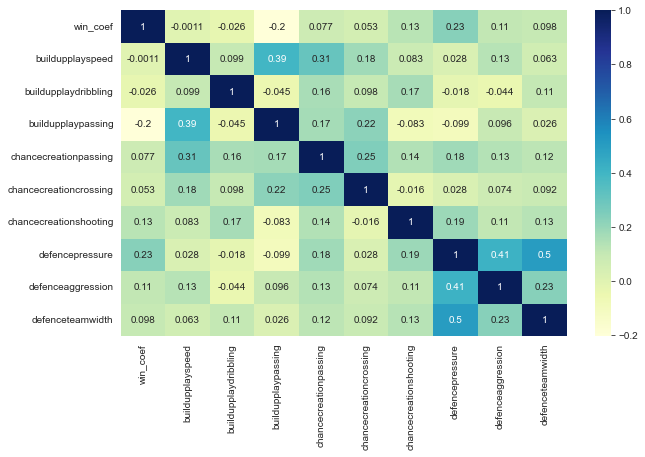

In [44]:
# построили матрицу корреляций для выявления наиболее актуальных атрибутов команд. нам интересно было бы включить переменные,
# которые коррелируют в наибольшей степени с переменной "win_coef". таковыми были выбраны "chancescreationsshooting", 
# "defencepressure", "defenceaggression"
plt.figure(figsize = (10,6))
sns.heatmap(match_stat_upd.iloc[:,[11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]].corr(), cmap="YlGnBu", annot=True)

In [45]:
match_stat_upd = match_stat_upd.drop(['date_x', 'team_api_id', 'team_fifa_api_id', 'team_long_name', 'team_short_name', 
                                      'id', 'date_y', 'buildupplayspeed', 'buildupplaydribbling', 'buildupplaypassing', 
                                      'chancecreationpassing', 'chancecreationcrossing', 'defenceteamwidth'], axis = 1)

In [46]:
match_stat_upd = match_stat_upd[match_stat_upd['year'] != 2008]

In [47]:
# заполним пропуски в атрибутах медианными значения в зависимости от сезона игр
match_stat_upd[['chancecreationshooting', 'defencepressure', 'defenceaggression']] = match_stat_upd[['chancecreationshooting',
                                                                                                     'defencepressure', 
                                                                                                     'defenceaggression']] \
    .fillna(match_stat_upd.groupby('year')[['chancecreationshooting', 'defencepressure', 'defenceaggression']] \
    .transform('median'))

In [48]:
# для 2015 и 2016 годов нет заполненных значений, поскольку в исходном датафрейме атрибутов команд данные приведены до 2015 года 
match_stat_upd[match_stat_upd.isna().any(axis=1)].groupby('year').count()

,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,league_name,home_team_ln,home_team,away_team_ln,away_team,win_coef,home_team_result,chancecreationshooting,defencepressure,defenceaggression
year,,,,,,,,,,,,,,,
2015,3374,3374,3374,3374,3374,3374,3374,3374,3374,3374,3374,3374,0,0,0
2016,1630,1630,1630,1630,1630,1630,1630,1630,1630,1630,1630,1630,0,0,0


In [49]:
match_stat_upd.head(2)

,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,league_name,home_team_ln,home_team,away_team_ln,away_team,win_coef,home_team_result,year,chancecreationshooting,defencepressure,defenceaggression
81,2008/2009,9993,9987,4,1,Belgium Jupiler League,Beerschot AC,Beerschot AC2008/2009,KRC Genk,KRC Genk2008/2009,0.323529,0,2009,50.0,70.0,70.0
82,2008/2009,9994,10000,2,1,Belgium Jupiler League,Sporting Lokeren,Sporting Lokeren2008/2009,SV Zulte-Waregem,SV Zulte-Waregem2008/2009,0.382353,0,2009,50.0,65.0,65.0


In [50]:
# Создали датафрейм с лигами и их средней разницой голов в матчах по сезонам
match_stat_upd['goal_diff'] = abs(match_stat_upd['home_team_goal'] - match_stat_upd['away_team_goal'])
df_league_power = match_stat_upd.groupby(['year', 'league_name'])['goal_diff'].describe().reset_index()
df_league_power

,year,league_name,count,mean,std,min,25%,50%,75%,max
0,2009,Belgium Jupiler League,297.0,1.377104,1.074527,0.0,1.00,1.0,2.0,6.0
1,2009,England Premier League,378.0,1.391534,1.229665,0.0,1.00,1.0,2.0,8.0
2,2009,France Ligue 1,377.0,1.257294,1.028894,0.0,1.00,1.0,2.0,5.0
3,2009,Germany 1. Bundesliga,306.0,1.388889,1.276165,0.0,0.00,1.0,2.0,6.0
4,2009,Italy Serie A,377.0,1.214854,1.023132,0.0,0.00,1.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...
83,2016,Poland Ekstraklasa,72.0,1.236111,1.204371,0.0,0.00,1.0,2.0,5.0
84,2016,Portugal Liga ZON Sagres,180.0,1.427778,1.294727,0.0,1.00,1.0,2.0,6.0
85,2016,Scotland Premier League,108.0,1.472222,1.377105,0.0,1.00,1.0,2.0,7.0
86,2016,Spain LIGA BBVA,211.0,1.554502,1.489844,0.0,1.00,1.0,2.0,8.0


In [51]:
# Добавляем в наш основной датафрейм среднюю разницу голов в матчах, сгруппированных по сезонам и лигам
match_stat_upd = match_stat_upd.merge(df_league_power, how = 'left', left_on=['year','league_name'],
                                                                     right_on=['year','league_name'])

In [52]:
match_stat_upd = match_stat_upd.drop(['count','std', 'min', '25%', '50%', '75%', 'max', 'goal_diff'], axis=1)

In [53]:
match_stat_upd = match_stat_upd.rename(columns = {'mean': 'avg_goal_diff_by_league'})

In [54]:
match_stat_f_model = match_stat_upd[match_stat_upd.year != 2015][match_stat_upd.year != 2016].reset_index(drop = True)

C:\Users\123\AppData\Local\Temp/ipykernel_7148/3240727098.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  match_stat_f_model = match_stat_upd[match_stat_upd.year != 2015][match_stat_upd.year != 2016].reset_index(drop = True)


In [55]:
match_stat_f_model.head()

,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,league_name,home_team_ln,home_team,away_team_ln,away_team,win_coef,home_team_result,year,chancecreationshooting,defencepressure,defenceaggression,avg_goal_diff_by_league
0,2008/2009,9993,9987,4,1,Belgium Jupiler League,Beerschot AC,Beerschot AC2008/2009,KRC Genk,KRC Genk2008/2009,0.323529,0,2009,50.0,70.0,70.0,1.377104
1,2008/2009,9994,10000,2,1,Belgium Jupiler League,Sporting Lokeren,Sporting Lokeren2008/2009,SV Zulte-Waregem,SV Zulte-Waregem2008/2009,0.382353,0,2009,50.0,65.0,65.0,1.377104
2,2008/2009,8635,9984,1,2,Belgium Jupiler League,RSC Anderlecht,RSC Anderlecht2008/2009,KSV Cercle Brugge,KSV Cercle Brugge2008/2009,0.705882,1,2009,60.0,70.0,50.0,1.377104
3,2008/2009,9998,9991,1,2,Belgium Jupiler League,RAEC Mons,RAEC Mons2008/2009,KAA Gent,KAA Gent2008/2009,0.088235,1,2009,65.0,50.0,55.0,1.377104
4,2008/2009,9985,7947,3,2,Belgium Jupiler League,Standard de Liège,Standard de Liège2008/2009,FCV Dender EH,FCV Dender EH2008/2009,0.705882,0,2009,65.0,70.0,70.0,1.377104


### Модель линейной регрессии, предсказывающая вероятность победы команды в матче.
###### P.S.: Наша основная модель

In [56]:
def win(match_stat_f_model):
    
    if match_stat_f_model.home_team_goal > match_stat_f_model.away_team_goal:
        return match_stat_f_model.home_team_ln
    elif match_stat_f_model.away_team_goal > match_stat_f_model.home_team_goal:
        return match_stat_f_model.away_team_ln
    else:
        return 'draw'

match_stat_f_model['match_winner'] = match_stat_f_model[['home_team_goal','away_team_goal','home_team_ln','away_team_ln']].apply(win, axis=1)

In [57]:
# функция, принимающая значения о полном названии команды и сезоне и выводящая метрики для этой команды на определенный сезон
def GetSeasonTeamStat(home_team_ln, year):

    win_coef = 0
    chancecreationshooting = 0
    defencepressure = 0
    defenceaggression = 0
    avg_goal_diff_by_league = 0
    
    for i in range(len(match_stat_f_model)):
        if ((match_stat_f_model['home_team_ln'][i] == home_team_ln) and (match_stat_f_model['year'][i] == year)):
             
            win_coef = match_stat_f_model['win_coef'][i]
            chancecreationshooting = match_stat_f_model['chancecreationshooting'][i]
            defencepressure = match_stat_f_model['defencepressure'][i]
            defenceaggression = match_stat_f_model['defenceaggression'][i]
            avg_goal_diff_by_league = match_stat_f_model['avg_goal_diff_by_league'][i]
    
    return [round(win_coef, 3), chancecreationshooting, defencepressure, defenceaggression, round(avg_goal_diff_by_league, 3)]

In [58]:
# пример для команды FCV Dender EH на 2009 год
GetSeasonTeamStat('FCV Dender EH', 2009)

[0.265, 65.0, 50.0, 55.0, 1.377]

In [59]:
import collections

In [137]:
# функция, принимающая значение года и выводящая все метрики для всех команд, присутствующих в датафрейме о результатах матчей,
# на указанный год
def GetSeasonAllTeamStat(year):
    annual = collections.defaultdict(list)
    for team in match_stat_f_model.home_team_ln.unique().tolist():
        team_vector = GetSeasonTeamStat(team, year)
        annual[team] = team_vector
    return annual

In [139]:
# функция, принимающая рэндж годов и выводящая все метрики для всех команд, присутствующих в датафрейме о результатах матчей,
# на указанный рэндж годов
def GetTrainingData(years):
    totalNumGames = 0
    for year in years:
        annual = match_stat_f_model[match_stat_f_model['year'] == year]
        totalNumGames += len(annual.index)
    numFeatures = len(GetSeasonTeamStat('FC Thun', 2014)) #случайная команда для определения размерности
    xTrain = np.zeros((totalNumGames, numFeatures))
    yTrain = np.zeros((totalNumGames))
    indexCounter = 0
    for year in years:
        team_vectors = GetSeasonAllTeamStat(year)
        annual = match_stat_f_model[match_stat_f_model['year'] == year]
        numGamesInYear = len(annual.index)
        xTrainAnnual = np.zeros((numGamesInYear, numFeatures))
        yTrainAnnual = np.zeros((numGamesInYear))
        counter = 0
        for index, rew in annual.iterrows():
            team = rew['home_team_ln']
            t_vector = team_vectors[team]
            rivals = rew['away_team_ln']
            r_vector = team_vectors[rivals]
           
            diff = [a - b for a, b in zip(t_vector, r_vector)]
            
            if len(diff) != 0:
                xTrainAnnual[counter] = diff
            if team == rew['match_winner']:
                yTrainAnnual[counter] = 1
            else: 
                yTrainAnnual[counter] = 0
            counter += 1   
        xTrain[indexCounter:numGamesInYear+indexCounter] = xTrainAnnual
        yTrain[indexCounter:numGamesInYear+indexCounter] = yTrainAnnual
        indexCounter += numGamesInYear
    return xTrain, yTrain

In [140]:
years = range(2009,2015)
xTrain, yTrain = GetTrainingData(years)

In [141]:
# функция, принимающая значения двух команд на определенный год и выводящая вероятность победы для 1 указанной команды
def createGamePrediction(team1_vector, team2_vector):
    diff = [[a - b for a, b in zip(team1_vector, team2_vector)]]
    predictions = model.predict(diff)
    return predictions

In [142]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xTrain, yTrain)

LinearRegression()

In [152]:
# пример для двух команд - Liverpool и FC Barcelona - на 2012 год. при этом команды играют в разных лигах, при этом результат
# выдается, поскольку модель устойчива к дифференцации лиг из-за устойчивых метрик
team1_vector = GetSeasonTeamStat('Liverpool', 2012)
team2_vector = GetSeasonTeamStat('FC Barcelona', 2012)

team1pred = createGamePrediction(team1_vector, team2_vector)
team2pred = createGamePrediction(team2_vector, team1_vector)
print("Вероятность победы 1 команды: ", team1pred)
print("Вероятность ничьи: ", 1.0-(team1pred+team2pred))
print("Вероятность победы 2 команды: ", team2pred)

Вероятность победы 1 команды:  [0.13174484]
Вероятность ничьи:  [0.07908064]
Вероятность победы 2 команды:  [0.78917452]


In [ ]:
# цикл выводит результаты вероятности побед и ничьей для указанной команды со всевозможными командами из исходного датафрейма
for team_name in match_stat_f_model.home_team_ln.tolist():
    team1_name = 'Beerschot AC'
    team2_name = team_name
    
    if(team1_name != team2_name):
        team1_vector = GetSeasonTeamStat(team1_name, 2010)
        team2_vector = GetSeasonTeamStat(team2_name, 2010)

        print(team1_name, createGamePrediction(team1_vector, team2_vector), " - ", team2_name, createGamePrediction(team2_vector, team1_vector,))

# Модели классификации

### RandomForestClassifier

In [71]:
X = match_stat_f_model.iloc[:,[10, 12, 13, 14, 15, 16]]
Y = match_stat_f_model.home_team_result

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 2020)

In [74]:
Y_train = np.array(Y_train)

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

Y_pred = rfc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.4337946705226193


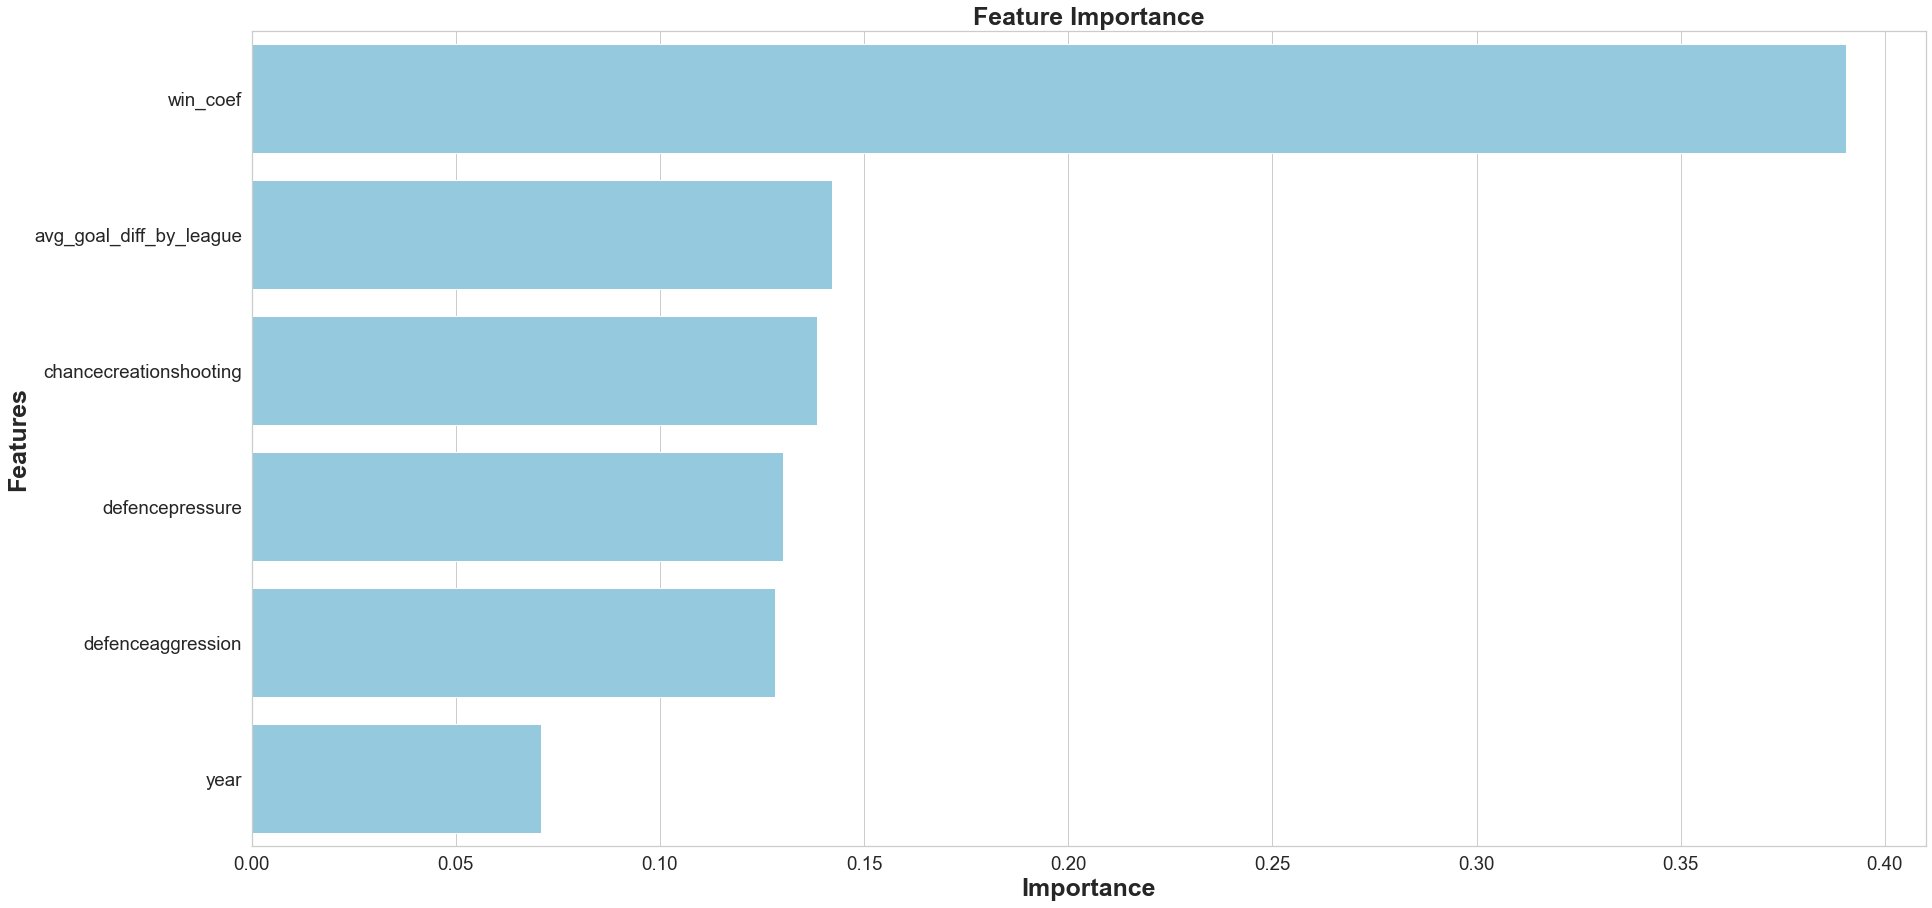

None

,Features,Gini-Importance
0,win_coef,0.390478
1,avg_goal_diff_by_league,0.142081
2,chancecreationshooting,0.138482
3,defencepressure,0.130032
4,defenceaggression,0.128047
5,year,0.070880


In [76]:
feats = {}
for feature, importance in zip(X.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

### Model XBClassifier

In [77]:
## Model XBClassifier
X = match_stat_f_model.iloc[:,[10, 12, 13, 14, 15, 16]]
Y = match_stat_f_model.home_team_result

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 2025)

In [79]:
Y_train = np.array(Y_train)

In [81]:
from xgboost import XGBClassifier



model = XGBClassifier()
model.fit(X_train, Y_train)

from sklearn.metrics import accuracy_score

Y_pred = model.predict(X_test)
predictions = [round(value) for value in Y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 44.68%


### KNeighbors Model

In [82]:
X = match_stat_f_model.iloc[:,[10, 12, 13, 14, 15, 16]]
Y = match_stat_f_model.home_team_result

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 870)

In [84]:
Y_train = np.array(Y_train)

In [85]:
# KNeighbors Model

from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
seed = 2001


model1 = KNeighborsClassifier()
model1.fit(X_train, Y_train)
Y_pred = model1.predict(X_test)
predictions = [round(value) for value in Y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 44.41%


### Logistic Regression Model

In [86]:
X = match_stat_f_model.iloc[:,[10, 12, 13, 14, 15, 16]]
Y = match_stat_f_model.home_team_result

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 650)

In [88]:
Y_train = np.array(Y_train)

In [89]:
# Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model4 = LogisticRegression()
model4.fit(X_train, Y_train)
Y_pred = model4.predict(X_test)
predictions = [round(value) for value in Y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 47.78%


C:\Users\123\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
